In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV
import time
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree

In [ ]:
#Classification of G3 in Dataset
df_mat = pd.read_csv("student-mat.csv", sep=';')
df=df_mat.copy()
# here we are assigning value 1 to marks greater than 10
# and value of 0 for marks less than 10
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#We are changing the values to 1 and 0 s so it is easier for us to work on them 
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 0, "MS": 1, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0,'mother': 0, 'father': 1, 'other': 2,'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4,'home':0, 'school':1 ,'reputation':2, 'course':3}
df.replace(cleanup_nums, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,0
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,0
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,1
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,1
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,5,5,4,4,5,4,11,9,9,0
391,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,3,14,16,1
392,1,0,21,1,1,0,1,1,4,4,...,5,5,3,3,3,3,3,10,8,0
393,1,0,18,1,0,0,3,2,2,4,...,4,4,1,3,4,5,0,11,12,1


In [ ]:
#KNN without tuning and random N_neighbours
x = df.values[:,0:32]
y = df.values[:,32]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)
#Shuffle set to false, allows you to use the previously trained data
#Setting this to true means that you either want to retrain or set the epoch to some value greater than 3
KNN= KNeighborsClassifier(n_neighbors=9)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy : '+str(accuracy)+'\nf1 score is: ',f1)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for KNN is:",mse)
print("RMSE for KNN is:",rmse)
print("MAE for KNN is:",mae)
print("R-Squared for KNN is",r2)
yt_knn,yp_knn= y_test,y_pred

print ('The confusion matrix ')
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)




Accuracy : 85.71428571428571
f1 score is:  0.8200978212538905
MSE for KNN is: 0.14285714285714285
RMSE for KNN is: 0.3779644730092272
MAE for KNN is: 0.14285714285714285
R-Squared for KNN is 0.3332234673698089
The confusion matrix 
[[24 13]
 [ 4 78]]


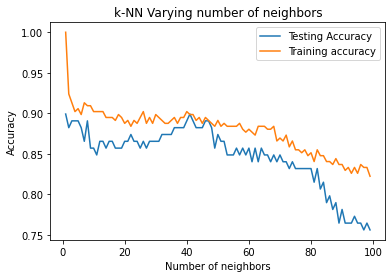

In the above plot as we can see that 
 
1)training accuracy is always greater than testing 

2)as we have 2 class to classify our data in so accuracy decreases at even n.o. of k 



In [ ]:
neighbors= np.arange(1,100)
train_accuracy =np.empty(99) # Return a new array of given shape and type
test_accuracy = np.empty(99) #  without initializing entries.

for i,k in enumerate(neighbors): # enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element.
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 
print("In the above plot as we can see that \n ")

print("1)training accuracy is always greater than testing \n")

print("2)as we have 2 class to classify our data in so accuracy decreases at even n.o. of k \n")

In [ ]:
#Best k for training
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)#cv-number of cross validation
#This is called hyperparameter optimization or hyperparameter tuning and is available in the scikit-learn 
#Python machine learning library. The result of a hyperparameter optimization is a single set of well-performing hyperparameters that you can use to configure your model.
knn_cv.fit(x_train,y_train)
#best score\n",
print("best score:",knn_cv.best_score_)
ba1=knn_cv.best_score_
print("best parameters",knn_cv.best_params_)
bp1=knn_cv.best_params_

best score: 0.8987012987012987
best parameters {'n_neighbors': 40}


In [ ]:
#Best of K for testing
param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_test,y_test)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba2=knn_cv.best_score_
bp2=knn_cv.best_params_

best score: 0.8996376811594203
best parameters {'n_neighbors': 3}


In [ ]:
#Best k for all dataset
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba3=knn_cv.best_score_
bp3=knn_cv.best_params_

best score: 0.8860759493670886
best parameters {'n_neighbors': 7}


In [ ]:
KNN_f= KNeighborsClassifier(n_neighbors=13)
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1knn = metrics.f1_score(y_test, y_pred, average='macro')
#A macro-average will compute the metric independently for each class
#and then take the average hence treating all classes equally
accknn = metrics.accuracy_score(y_test, y_pred)*100
yt_knn,yp_knn= y_test,y_pred
accknn = metrics.accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',accknn)
print('f1 score is: ',f1knn)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for KNN is:",mse)
print("RMSE for KNN is:",rmse)
print("MAE for KNN is:",mae)
print("R-Squared for KNN is",r2)
#precision - true positive / assumed positive
#recall - true positive / actual positive
#f1 - score - harmonic mean of precision and recall
#macro average - sum of all the f1- score divied by the no of elements
#support - the actual number of occurences in the class
#support proportion - actual occurences / total items 
#weighted average - sum of support proporation into f1 score 
cmknn= metrics.confusion_matrix(yt_knn,yp_knn)
yt_knn,yp_knn = y_test,y_pred
print("\nClassification matrix:\n")
print(metrics.classification_report(y_test,y_pred))
print("\nConfusion matrix:\n")
print(cmknn)
cknn={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}

Accuracy is:  0.865546218487395
f1 score is:  0.8322762508809021
MSE for KNN is: 0.13445378151260504
RMSE for KNN is: 0.36667939881128453
MAE for KNN is: 0.13445378151260504
R-Squared for KNN is 0.3724456163480554

Classification matrix:

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        37
           1       0.87      0.95      0.91        82

    accuracy                           0.87       119
   macro avg       0.86      0.81      0.83       119
weighted avg       0.87      0.87      0.86       119


Confusion matrix:

[[25 12]
 [ 4 78]]


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
linreg = reg.fit(x_train, y_train)
predictionLR = linreg.predict(x_test)
f1linr = metrics.f1_score(y_test, predictionLR, average='macro')
aclinr = metrics.accuracy_score(y_test, predictionLR)*100
print('Accuracy is: ',aclinr)
print('\nf1 score is: ',f1linr)
mae = metrics.mean_absolute_error(y_test, predictionLR)
mse = metrics.mean_squared_error(y_test, predictionLR)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionLR)
print("MSE for Logistic Regression is:",mse)
print("RMSE for Logistic Regression is:",rmse)
print("MAE for Logistic Regression is:",mae)
print("R-Squared for Logistic Regression is",r2)
print("Linear Regression Model Score" , ":" , linreg.score(x_train, y_train))
print("Cross Validation Score" ,":" , linreg.score(x_test, y_test))

ValueError: ignored

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
s = logreg.fit(x_train, y_train)
predictionlr = s.predict(x_test)
f1lr = metrics.f1_score(y_test, predictionlr, average='macro')
aclr = metrics.accuracy_score(y_test, predictionlr)*100
print('Accuracy is: ',aclr)
print('\nf1 score is: ',f1lr)
mae = metrics.mean_absolute_error(y_test, predictionlr)
mse = metrics.mean_squared_error(y_test, predictionlr)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for Logistic Regression is:",mse)
print("RMSE for Logistic Regression is:",rmse)
print("MAE for Logistic Regression is:",mae)
print("R-Squared for Logistic Regression is",r2)
print("SVC Model Score" , ":" , s.score(x_train, y_train))
print("Cross Validation Score" ,":" , s.score(x_test, y_test))
print("\nClassification Matrix : \n")
print(metrics.classification_report(y_test, predictionlr))
print("\nConfusion Matrix : \n")
print(metrics.confusion_matrix(y_test, predictionlr))

Accuracy is:  80.51282051282051

f1 score is:  0.7336831512363426
MSE for Logistic Regression is: 0.19487179487179487
RMSE for Logistic Regression is: 0.4414428557263045
MAE for Logistic Regression is: 0.19487179487179487
R-Squared for Logistic Regression is -0.4095214356929209
SVC Model Score : 0.960352422907489
Cross Validation Score : 0.8051282051282052

Classification Matrix : 

              precision    recall  f1-score   support

           0       0.80      0.47      0.60        59
           1       0.81      0.95      0.87       136

    accuracy                           0.81       195
   macro avg       0.80      0.71      0.73       195
weighted avg       0.80      0.81      0.79       195


Confusion Matrix : 

[[ 28  31]
 [  7 129]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#SVC without Tuning
from sklearn.svm import SVC
svc = SVC()
s = svc.fit(x_train, y_train)
predictionsvc = s.predict(x_test)
f1svc = metrics.f1_score(y_test, predictionsvc, average='macro')
accsvc = metrics.accuracy_score(y_test, predictionsvc)*100
print('Accuracy is: ',accsvc)
print('\nf1 score is: ',f1svc)
mae = metrics.mean_absolute_error(y_test, predictionsvc)
mse = metrics.mean_squared_error(y_test, predictionsvc)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionsvc)
print("MSE for SVC(untuned) is:",mse)
print("RMSE for SVC(untuned) is:",rmse)
print("MAE for SVC(untuned) is:",mae)
print("R-Squared for SVC(untuned) is",r2)
print("SVC Model Score" , ":" , s.score(x_train, y_train))
print("Cross Validation Score" ,":" , s.score(x_test, y_test))
print("\nClassification Matrix : \n")
print(metrics.classification_report(y_test, predictionsvc))
print("\nConfusion Matrix : \n")
print(metrics.confusion_matrix(y_test, predictionsvc))

Accuracy is:  69.74358974358974

f1 score is:  0.41087613293051356
MSE for SVC(untuned) is: 0.30256410256410254
RMSE for SVC(untuned) is: 0.5500582719713454
MAE for SVC(untuned) is: 0.30256410256410254
R-Squared for SVC(untuned) is -0.4338235294117643
SVC Model Score : 0.9074889867841409
Cross Validation Score : 0.6974358974358974

Classification Matrix : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.82       136

    accuracy                           0.70       195
   macro avg       0.35      0.50      0.41       195
weighted avg       0.49      0.70      0.57       195


Confusion Matrix : 

[[  0  59]
 [  0 136]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVC with Tuning 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
from sklearn.svm import SVC
svc = SVC()

params = {'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly','linear']}


grid_search = GridSearchCV(estimator=svc, 
                           param_grid=params, 
                           cv=3)
gr = grid_search.fit(x_train, y_train)
predictionsvc = gr.predict(x_test)
best=grid_search.best_estimator_
print(best)
#We get the following hyperparameters after using GridSearchCV
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
mae = metrics.mean_absolute_error(y_test, predictionsvc)
mse = metrics.mean_squared_error(y_test, predictionsvc)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for SVC is:",mse)
print("RMSE for SVC is:",rmse)
print("MAE for SVC is:",mae)
print("R-Squared for SVC is",r2)
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

SVC(C=0.1, gamma=1, kernel='linear')
Accuracy: 0.907563025210084
F1 Score: 0.9341317365269461
MSE for SVC is: 0.09243697478991597
RMSE for SVC is: 0.30403449605253013
MAE for SVC is: 0.09243697478991597
R-Squared for SVC is 0.3724456163480554

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.92      0.95      0.93        82

    accuracy                           0.91       119
   macro avg       0.90      0.88      0.89       119
weighted avg       0.91      0.91      0.91       119

[[25 12]
 [ 4 78]]


In [ ]:
#Bernoulli Naive Bayes Classifiers
clf=  BernoulliNB ()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f1bnb = metrics.f1_score(y_test, y_pred, average='macro')
accbnb = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy is: '+str(accbnb)+'f1 score is: ',f1bnb)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for Bernoulli Naive Bayes is:",mse)
print("RMSE for Bernoulli Naive Bayes is:",rmse)
print("MAE for Bernoulli Naive Bayes is:",mae)
print("R-Squared for Bernoulli Naive Bayes is",r2)


yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:
print("Classification matrix:",metrics.classification_report(y_test,y_pred))
print ('Confusion matrix ')

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
cbnb={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}




Accuracy is: 68.90756302521008f1 score is:  0.6398364008179958
MSE for Bernoulli Naive Bayes is: 0.31092436974789917
RMSE for Bernoulli Naive Bayes is: 0.5576059269303898
MAE for Bernoulli Naive Bayes is: 0.31092436974789917
R-Squared for Bernoulli Naive Bayes is -0.4512195121951219
Classification matrix:               precision    recall  f1-score   support

           0       0.50      0.51      0.51        37
           1       0.78      0.77      0.77        82

    accuracy                           0.69       119
   macro avg       0.64      0.64      0.64       119
weighted avg       0.69      0.69      0.69       119

Confusion matrix 
[[19 18]
 [19 63]]


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#Decision Tree without tuning
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f1bnb = metrics.f1_score(y_test, y_pred, average='macro')
accbnb = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy is: '+str(accbnb)+'\nf1 score is: ',f1bnb)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for Decision Tree  is:",mse)
print("RMSE for Decision Tree  is:",rmse)
print("MAE for Decision Tree  is:",mae)
print("R-Squared for Decision Tree  is",r2)

yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:
print("Classification matrix:",metrics.classification_report(y_test,y_pred))
print ('Confusion matrix ')

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)





Accuracy is: 89.91596638655463
f1 score is:  0.8870253164556962
MSE for Decision Tree  is: 0.10084033613445378
RMSE for Decision Tree  is: 0.3175536744149779
MAE for Decision Tree  is: 0.10084033613445378
R-Squared for Decision Tree  is 0.5293342122610416
Classification matrix:               precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.96      0.89      0.92        82

    accuracy                           0.90       119
   macro avg       0.88      0.90      0.89       119
weighted avg       0.91      0.90      0.90       119

Confusion matrix 
[[34  3]
 [ 9 73]]


In [ ]:
#Decision Tree Classifiers with tuning
clf = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': np.arange(5,30),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=6)
grdtc = grid_search.fit(x_train, y_train)
predictiondtc = grdtc.predict(x_test)
best=grid_search.best_estimator_
print(best)
#We get the following hyperparameters after using GridSearchCV
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
mae = metrics.mean_absolute_error(y_test, predictiondtc)
mse = metrics.mean_squared_error(y_test, predictiondtc)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for Decision Tree is:",mse)
print("RMSE for Decision Tree is:",rmse)
print("MAE for Decision Tree is:",mae)
print("R-Squared for Decision Tree is",r2)
print("\n")
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
Accuracy: 0.9243697478991597
F1 Score: 0.9440993788819876
MSE for Decision Tree is: 0.07563025210084033
RMSE for Decision Tree is: 0.27500954910846337
MAE for Decision Tree is: 0.07563025210084033
R-Squared for Decision Tree is 0.5293342122610416



Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.96      0.93      0.94        82

    accuracy                           0.92       119
   macro avg       0.91      0.92      0.91       119
weighted avg       0.93      0.92      0.93       119

[[34  3]
 [ 9 73]]


In [ ]:
#FOR DATASET OF STUDENT - PORTUGUESE

In [ ]:
#fetching the data from csv file
df_por = pd.read_csv("student-por.csv", sep=';')
df=df_por.copy()
# if marks of student in g3 is>or equal to 10 then classify it in class 1 or else in class 0
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,1


In [ ]:
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 0, "MS": 1, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0,'mother': 0, 'father': 1, 'other': 2,'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4,'home':0, 'school':1 ,'reputation':2, 'course':3}
df.replace(cleanup_nums, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,1
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,1
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,1
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,1
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,1
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,1
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,0
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,1


In [ ]:
x = df.values[:,0:31]
y = df.values[:,32]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)#splitting test and train data

In [ ]:
KNN= KNeighborsClassifier(n_neighbors=9)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Knn classifier")
print('\nAccuracy : '+str(accuracy)+'\nf1 score is: ',f1)
print("\n")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for KNN is:",mse)
print("RMSE for KNN is:",rmse)
print("MAE for KNN is:",mae)
print("R-Squared for KNN is",r2)
print("\n")
print ('The confusion matrix :')
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

Knn classifier

Accuracy : 72.82051282051282
f1 score is:  0.5436884630668021


MSE for KNN is: 0.2717948717948718
RMSE for KNN is: 0.5213394976355348
MAE for KNN is: 0.2717948717948718
R-Squared for KNN is -0.28801096709870366


The confusion matrix :
[[  9  50]
 [  3 133]]


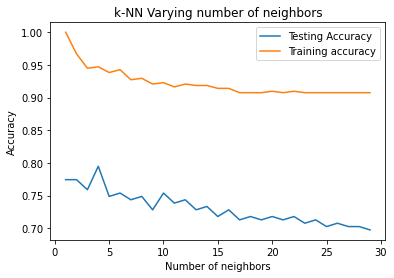

In [ ]:
neighbors= np.arange(1,30)
train_accuracy =np.empty(29)
test_accuracy = np.empty(29)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

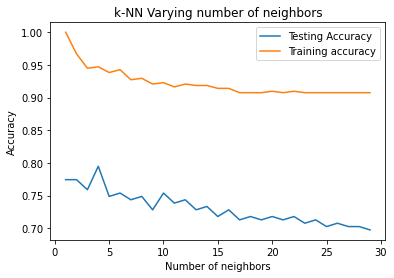

In [ ]:
neighbors= np.arange(1,30)
train_accuracy =np.empty(29)
test_accuracy = np.empty(29)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [ ]:
#training accuracy is always greater than testing
#as we have 2 class to classify our data in so accuracy decreases at even n.o. of k
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)
#best score\n",
print("best score:",knn_cv.best_score_)
ba1=knn_cv.best_score_
print("best parameters",knn_cv.best_params_)
bp1=knn_cv.best_params_

best score: 0.9251282051282053
best parameters {'n_neighbors': 6}


In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_test,y_test)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba2=knn_cv.best_score_
bp2=knn_cv.best_params_

best score: 0.7743589743589744
best parameters {'n_neighbors': 9}


In [ ]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba3=knn_cv.best_score_
bp3=knn_cv.best_params_

best score: 0.884412641621944
best parameters {'n_neighbors': 10}


In [ ]:
#KNN after tuning
KNN_f= KNeighborsClassifier(n_neighbors=10)
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1knn = metrics.f1_score(y_test, y_pred, average='macro')
#A macro-average will compute the metric independently for each class
#and then take the average hence treating all classes equally
accknn = metrics.accuracy_score(y_test, y_pred)*100
yt_knn,yp_knn= y_test,y_pred
accknn = metrics.accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',accknn)
print('\nf1 score is: ',f1knn)
print("\n")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for KNN is:",mse)
print("RMSE for KNN is:",rmse)
print("MAE for KNN is:",mae)
print("R-Squared for KNN is",r2)
print("\n")
cmknn= metrics.confusion_matrix(yt_knn,yp_knn)
yt_knn,yp_knn = y_test,y_pred
print("\nClassification matrix:\n")
print(metrics.classification_report(y_test,y_pred))
print("\nConfusion matrix:\n")
print(cmknn)
cknn={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}

Accuracy is:  0.7538461538461538

f1 score is:  0.6077774052966812


MSE for KNN is: 0.24615384615384617
RMSE for KNN is: 0.4961389383568338
MAE for KNN is: 0.24615384615384617
R-Squared for KNN is -0.16650049850448623



Classification matrix:

              precision    recall  f1-score   support

           0       0.82      0.24      0.37        59
           1       0.75      0.98      0.85       136

    accuracy                           0.75       195
   macro avg       0.79      0.61      0.61       195
weighted avg       0.77      0.75      0.70       195


Confusion matrix:

[[ 14  45]
 [  3 133]]


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
linreg = reg.fit(x_train, y_train)
predictionLR = linreg.predict(x_test)
f1linr = metrics.f1_score(y_test, y_pred, average='macro')
aclinr = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy is: ',aclinr)
print('\nf1 score is: ',f1linr)
print("\n")
mae = metrics.mean_absolute_error(y_test, predictionLR)
mse = metrics.mean_squared_error(y_test, predictionLR)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionLR)
print("MSE for Linear Regression is:",mse)
print("RMSE for Linear Regression is:",rmse)
print("MAE for Linear Regression is:",mae)
print("R-Squared for Linear Regression is",r2)
print("\n")
print("SVC Model Score" , ":" , linreg.score(x_train, y_train))
print("Cross Validation Score" ,":" , linreg.score(x_test, y_test))

Accuracy is:  75.38461538461539

f1 score is:  0.6077774052966812


MSE for Linear Regression is: 0.16452669711722592
RMSE for Linear Regression is: 0.4056189062620552
MAE for Linear Regression is: 0.32479205681044093
R-Squared for Linear Regression is 0.22032307354405356


SVC Model Score : 0.38252388048517283
Cross Validation Score : 0.22032307354405356


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
logreg = LogisticRegression()
s = logreg.fit(x_train, y_train)
predictionlr = s.predict(x_test)
f1lr = metrics.f1_score(y_test, y_pred, average='macro')
aclr = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy is: ',aclr)
print('\nf1 score is: ',f1lr)
print("\n")
mae = metrics.mean_absolute_error(y_test, predictionlr)
mse = metrics.mean_squared_error(y_test, predictionlr)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionlr)
print("MSE for Logistic Regression is:",mse)
print("RMSE for Logistic Regression is:",rmse)
print("MAE for Logistic Regression is:",mae)
print("R-Squared for Logistic Regression is",r2)
print("\n")
print("SVC Model Score" , ":" , s.score(x_train, y_train))
print("Cross Validation Score" ,":" , s.score(x_test, y_test))
print("\nClassification Matrix : \n")
print(metrics.classification_report(y_test, predictionlr))
print("\nConfusion Matrix : \n")
print(metrics.confusion_matrix(y_test, predictionlr))


Accuracy is:  75.38461538461539

f1 score is:  0.6077774052966812


MSE for Logistic Regression is: 0.19487179487179487
RMSE for Logistic Regression is: 0.4414428557263045
MAE for Logistic Regression is: 0.19487179487179487
R-Squared for Logistic Regression is 0.07652043868394842


SVC Model Score : 0.960352422907489
Cross Validation Score : 0.8051282051282052

Classification Matrix : 

              precision    recall  f1-score   support

           0       0.80      0.47      0.60        59
           1       0.81      0.95      0.87       136

    accuracy                           0.81       195
   macro avg       0.80      0.71      0.73       195
weighted avg       0.80      0.81      0.79       195


Confusion Matrix : 

[[ 28  31]
 [  7 129]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#SVC without Tuning
from sklearn.svm import SVC
svc = SVC()
s = svc.fit(x_train, y_train)
predictionsvc = s.predict(x_test)
f1svc = metrics.f1_score(y_test, y_pred, average='macro')
accsvc = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy is: ',accsvc)
print('\nf1 score is: ',f1svc)
print("\n")
mae = metrics.mean_absolute_error(y_test, predictionsvc)
mse = metrics.mean_squared_error(y_test, predictionsvc)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionsvc)
print("MSE for SVC is:",mse)
print("RMSE for SVC is:",rmse)
print("MAE for SVC is:",mae)
print("R-Squared for SVC is",r2)
print("\n")
print("SVC Model Score" , ":" , s.score(x_train, y_train))
print("Cross Validation Score" ,":" , s.score(x_test, y_test))
print("\nClassification Matrix : \n")
print(metrics.classification_report(y_test, predictionsvc))
print("\nConfusion Matrix : \n")
print(metrics.confusion_matrix(y_test, predictionsvc))

Accuracy is:  75.38461538461539

f1 score is:  0.6077774052966812


MSE for SVC is: 0.30256410256410254
RMSE for SVC is: 0.5500582719713454
MAE for SVC is: 0.30256410256410254
R-Squared for SVC is -0.4338235294117643


SVC Model Score : 0.9074889867841409
Cross Validation Score : 0.6974358974358974

Classification Matrix : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.82       136

    accuracy                           0.70       195
   macro avg       0.35      0.50      0.41       195
weighted avg       0.49      0.70      0.57       195


Confusion Matrix : 

[[  0  59]
 [  0 136]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVC with Tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
from sklearn.svm import SVC
svc = SVC()

params = {'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly','linear']}


grid_search = GridSearchCV(estimator=svc, 
                           param_grid=params, 
                           cv=3)
grsvc = grid_search.fit(x_train, y_train)
predictionsvc = grsvc.predict(x_test)
best=grid_search.best_estimator_
print(best)
#We get the following hyperparameters after using GridSearchCV
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
print("\n")
maesvc = metrics.mean_absolute_error(y_test, predictionsvc)
msesvc = metrics.mean_squared_error(y_test, predictionsvc)
rmsesvc = np.sqrt(mse) 
r2svc = metrics.r2_score(y_test,predictionsvc)
print("MSE for SVC is:",msesvc)
print("RMSE for SVC is:",rmsesvc)
print("MAE for SVC is:",maesvc)
print("R-Squared for SVC is",r2svc)
print("\n")
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

SVC(C=100, gamma=0.0001)
Accuracy: 0.8051282051282052
F1 Score: 0.8716216216216216


MSE for SVC is: 0.19487179487179487
RMSE for SVC is: 0.5500582719713454
MAE for SVC is: 0.19487179487179487
R-Squared for SVC is 0.07652043868394842



Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.47      0.60        59
           1       0.81      0.95      0.87       136

    accuracy                           0.81       195
   macro avg       0.80      0.71      0.73       195
weighted avg       0.80      0.81      0.79       195

[[ 14  45]
 [  3 133]]


In [ ]:
clf=  BernoulliNB ()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f1bnb = metrics.f1_score(y_test, y_pred, average='macro')
accbnb = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy is: '+str(accbnb)+'\n*f1 score is: ',f1bnb)
print("\n")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)
print("MSE for Bernoulli Naive Bayes is:",mse)
print("RMSE for Bernoulli Naive Bayes is:",rmse)
print("MAE for Bernoulli Naive Bayes is:",mae)
print("R-Squared for Bernoulli Naive Bayes is",r2)
print("\n")

yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:
print("Classification matrix:",metrics.classification_report(y_test,y_pred))
print (' *the confusion matrix ')

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


cbnb={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}




Accuracy is: 70.25641025641025
*f1 score is:  0.6286446020488574


MSE for Bernoulli Naive Bayes is: 0.29743589743589743
RMSE for Bernoulli Naive Bayes is: 0.5453768398418634
MAE for Bernoulli Naive Bayes is: 0.29743589743589743
R-Squared for Bernoulli Naive Bayes is -0.4095214356929209


Classification matrix:               precision    recall  f1-score   support

           0       0.51      0.42      0.46        59
           1       0.77      0.82      0.79       136

    accuracy                           0.70       195
   macro avg       0.64      0.62      0.63       195
weighted avg       0.69      0.70      0.69       195

 *the confusion matrix 
[[ 25  34]
 [ 24 112]]


In [ ]:
import time
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

start_time = time.time()

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': np.arange(5,50),
    'min_samples_leaf': np.arange(5,30),
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=6)
grdtc = grid_search.fit(x_train, y_train)
predictionDTC = grdtc.predict(x_test)

In [ ]:
best=grid_search.best_estimator_
print(best)
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
print("\n")
mae = metrics.mean_absolute_error(y_test, predictionDTC)
mse = metrics.mean_squared_error(y_test, predictionDTC)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,predictionDTC)
print("MSE for Decision Tree is:",mse)
print("RMSE for Decision Tree is:",rmse)
print("MAE for Decision Tree is:",mae)
print("R-Squared for Decision Tree is",r2)
print("\n")
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}
print("\nClassification Metrics:")
print(metrics.classification_report(y_test,best.predict(x_test)))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=11, random_state=42)
Accuracy: 0.8461538461538461
F1 Score: 0.8897058823529411


MSE for Decision Tree is: 0.15384615384615385
RMSE for Decision Tree is: 0.3922322702763681
MAE for Decision Tree is: 0.15384615384615385
R-Squared for Decision Tree is 0.27093718843469605



Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        59
           1       0.89      0.89      0.89       136

    accuracy                           0.85       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.85      0.85      0.85       195


Classification Metrics:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        59
           1       0.89      0.89      0.89       136

    accuracy                           0.85       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.85   